Saving bricks.jpg to bricks.jpg


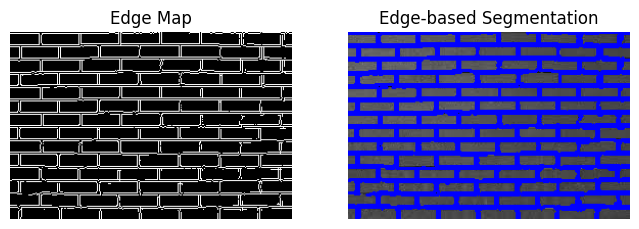

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Upload and Read Image ---
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read image in grayscale and color
img = cv2.imread(image_path, 0)
img_1 = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

if img is None:
    raise ValueError("Failed to load image!")

# --- Step 2: Edge Detection (Canny) ---
edges = cv2.Canny(img, 100, 200)

# --- Step 3: Find Contours (Segmentation) ---
# Syntax: findContours(image, mode, method)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert to color to draw red contours
segmented = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(segmented, contours, -1, (0, 0, 255), 2)

# --- Step 4: Morphological Operations ---
# Create Structuring Element (Kernel)
kernel = np.ones((3, 3), np.uint8)

# Dilation - thickens edges
dilated = cv2.dilate(edges, kernel, iterations=1)

# Erosion - thins edges / removes noise
eroded = cv2.erode(dilated, kernel, iterations=1)

# Opening - erosion followed by dilation (useful for removing noise)
opening = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)

# Closing - dilation followed by erosion (useful for closing small holes)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# --- Step 5: Display Results ---

# Display Segmentation Results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Edge Map")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Edge-based Segmentation")
plt.imshow(segmented)
plt.axis("off")
plt.show()


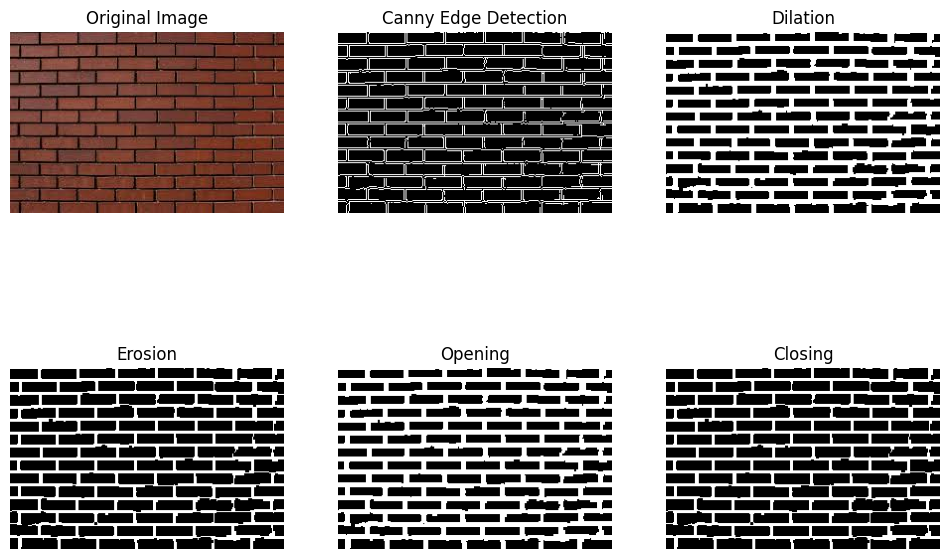

In [5]:
# Display Morphological Operations Results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Dilation")
plt.imshow(dilated, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Erosion")
plt.imshow(eroded, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Opening")
plt.imshow(opening, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Closing")
plt.imshow(closing, cmap="gray")
plt.axis("off")

plt.show()